In [1]:
print('This is a notebook with hyperparameterised code')

This is a notebook with hyperparameterised code


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [9]:
## Reading the dataset using pandas
dataset = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [14]:
## Data cleaning Process
## checking missing values

dataset[dataset.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [ ]:
## The dataset is converted into two sets based on the regions from 122th index , we can make a new column based on the regions

## 1. Sidi-Bel Abbes Region
## 2. bejaire Region

## add new column with the dataset



In [16]:
dataset.loc[:122,'Region'] = 0
dataset.loc[122:,'Region'] = 1
df = dataset

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       246 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.0+ KB


In [18]:
df[['Region']] = df[['Region']].astype(int)

In [19]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [20]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [21]:
## Removing the null values
df.dropna().reset_index(drop=True)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1
240,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
241,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
242,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [22]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [27]:
df = df.drop(122).reset_index(drop=True)

In [28]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [29]:
df = df.drop(122).reset_index(drop=True)
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [30]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [31]:
## fix spaces in columns names
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [33]:
## change the required columns as integer data type
df[['day', 'month', 'year', 'Temperature','RH', 'Ws']] = df[['day', 'month', 'year', 'Temperature','RH', 'Ws']].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    int32 
 1   month        244 non-null    int32 
 2   year         244 non-null    int32 
 3   Temperature  244 non-null    int32 
 4   RH           244 non-null    int32 
 5   Ws           244 non-null    int32 
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
 14  Region       244 non-null    int32 
dtypes: int32(7), object(8)
memory usage: 22.1+ KB


In [57]:
# Identify non-numeric values in the object-type columns
objects = [features for features in df.columns if df[features].dtype == 'O']

for col in objects:
    if col != 'Classes':  # Skip 'Classes' as per your logic
        print(f"Non-numeric values in column '{col}':")
        non_numeric = df[~df[col].str.replace('.', '', regex=False).str.isnumeric()]
        print(non_numeric[[col]])
        print()


Non-numeric values in column 'DC':
         DC
165  14.6 9

Non-numeric values in column 'ISI':
Empty DataFrame
Columns: [ISI]
Index: []

Non-numeric values in column 'BUI':
Empty DataFrame
Columns: [BUI]
Index: []

Non-numeric values in column 'FWI':
         FWI
11      7.1 
165  fire   



In [58]:
# Clean the data by removing spaces and non-numeric characters
for col in objects:
    if col != 'Classes':
        # Replace spaces with dots if necessary (or remove spaces if they are not decimal points)
        df[col] = df[col].str.replace(' ', '.', regex=False)
        
        # Remove any remaining non-numeric characters
        df[col] = df[col].str.replace(r'[^\d.]+', '', regex=True)

        # Convert the cleaned column to float
        df[col] = pd.to_numeric(df[col], errors='coerce')


In [59]:
objects

['DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   year         244 non-null    int32  
 3   Temperature  244 non-null    int32  
 4   RH           244 non-null    int32  
 5   Ws           244 non-null    int32  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          242 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       244 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 22.1+ KB


In [61]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,243.000000,244.000000,244.000000,242.000000,244.000000
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.430864,4.774180,16.664754,7.035124,0.500000
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.665606,4.175318,14.204824,7.455987,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.250000,4.200000,0.500000
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,69.100000,7.300000,22.525000,11.525000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [62]:
## let save the cleaned dataset
df.to_csv('Algerian_forest_fires_cleaned_dataset.csv', index=False)

In [68]:
## Exploratory data analysis
df_copy = df


In [75]:
df_copy = df.drop(['day','month','year'], axis=1)
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [76]:
df_copy['Classes']=np.where(df_copy['Classes']=='not fire   ',0,1)

In [77]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [78]:
df_copy['Classes'].value_counts()

Classes
1    143
0    101
Name: count, dtype: int64

In [79]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  244 non-null    int32  
 1   RH           244 non-null    int32  
 2   Ws           244 non-null    int32  
 3   Rain         244 non-null    float64
 4   FFMC         244 non-null    float64
 5   DMC          244 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          244 non-null    float64
 8   BUI          244 non-null    float64
 9   FWI          242 non-null    float64
 10  Classes      244 non-null    int32  
 11  Region       244 non-null    int32  
dtypes: float64(7), int32(5)
memory usage: 18.2 KB


In [81]:
import seaborn as sns

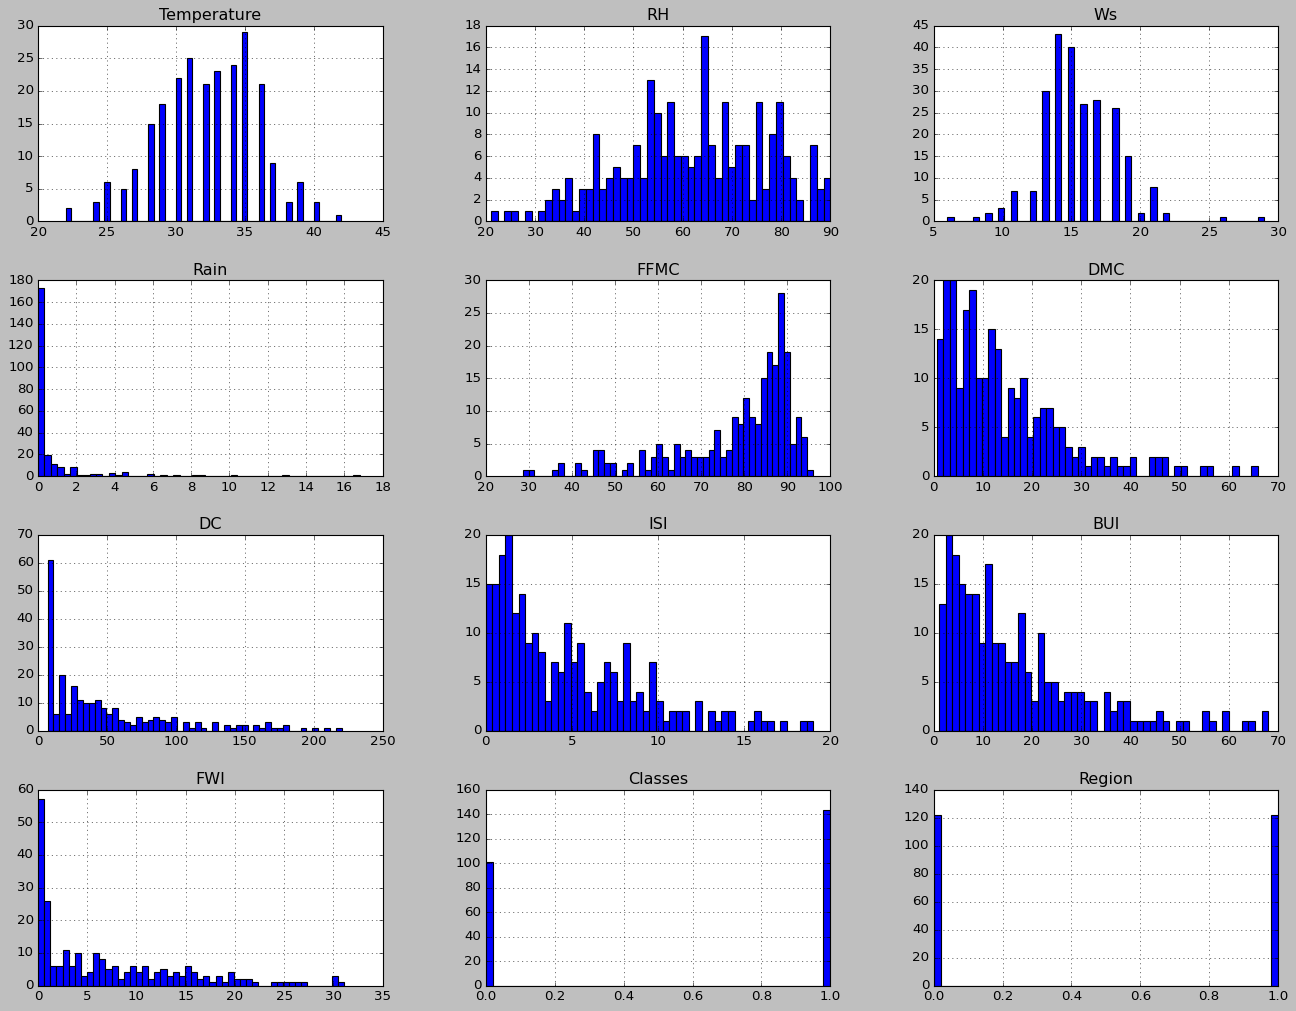

In [83]:
##plot density for all features
plt.style.use('classic')
df_copy.hist(bins=50, figsize=(20,15))
plt.show()

In [84]:
## Percentage for pie chart
df_copy['Classes'].value_counts(normalize=True)*100

Classes
1    58.606557
0    41.393443
Name: proportion, dtype: float64

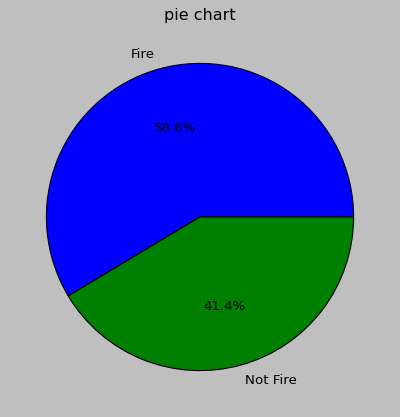

In [85]:
## ploting pie chart
classlabels=['Fire','Not Fire']
plt.figure(figsize=(10,6))
plt.pie(df_copy['Classes'].value_counts(),labels=classlabels,autopct='%1.1f%%')
plt.title("pie chart")
plt.show()

In [86]:
## correlation matrix
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.376284,0.607551,0.455504,0.570143,0.457499,0.273496
RH,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.226941,-0.690637,-0.348587,-0.582983,-0.416340,-0.406424
Ws,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.079135,0.015248,0.029756,0.032428,-0.050696,-0.176829
Rain,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.298023,-0.347105,-0.299171,-0.324506,-0.247604,-0.041080
FFMC,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.507397,0.739730,0.589652,0.691381,0.709060,0.224680
DMC,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875925,0.674499,0.982073,0.875876,0.556322,0.191094
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739608,0.479396,-0.078734
ISI,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,0.508643,1.000000,0.635891,0.922895,0.700924,0.268421
BUI,0.455504,-0.348587,0.029756,-0.299171,0.589652,0.982073,0.941988,0.635891,1.000000,0.857980,0.554842,0.087370
FWI,0.570143,-0.582983,0.032428,-0.324506,0.691381,0.875876,0.739608,0.922895,0.857980,1.000000,0.688625,0.197543


<Axes: >

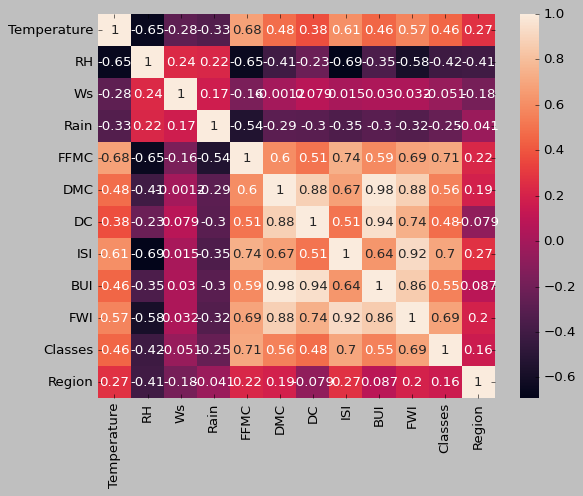

In [87]:
sns.heatmap(df_copy.corr(),annot=True)

<Axes: ylabel='FWI'>

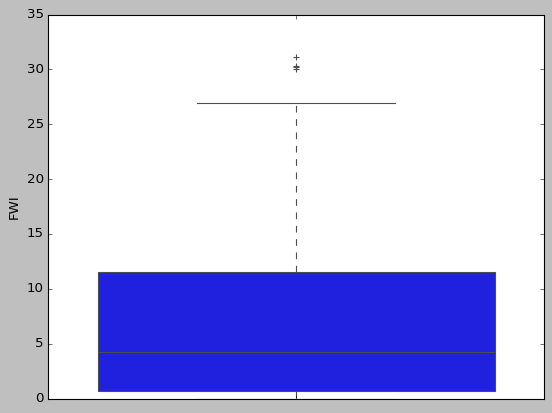

In [89]:
## Box plots 
sns.boxplot(df['FWI'])

<Axes: xlabel='month', ylabel='count'>

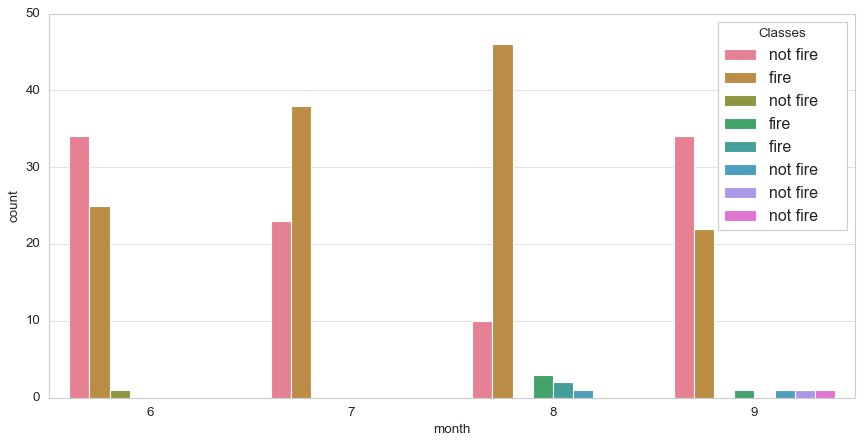

In [94]:
## Monthly Fire Analysis
dftemp=df.loc[df['Region']==1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df)